*In this notebook, we provide a comparison of several non-hydrostatic shallow-water models for the propagation of surface gravity waves. Specifically, we compare the standard Green-Naghdi model*

- *first with the non-hydrostatic model of [Bristeau, Mangeney, Sainte-Marie and Seguin](https://dx.doi.org/10.3934/dcdsb.2015.20.961) and the square-root depth system of [Cotter, Holm and Percival](https://dx.doi.org/10.1098/rspa.2010.0124),*
- *then with the fully dispersive counterpart of [Duchêne, Israwi and Talhouk](https://dx.doi.org/10.1111/sapm.12125),*
- *finally with the [Isobe-Kakinuma model](https://dx.doi.org/10.1061/9780784400890.023).*

# Initialization

Import package

In [1]:
using WaterWaves1D
import LinearAlgebra.norm

Define parameters of the problem

In [2]:
param = ( 
    # Physical parameters. Variables are non-dimensionalized as in Lannes, The water waves problem, isbn:978-0-8218-9470-5
    μ  = 0.1,   # shallow-water dimensionless parameter
    ϵ  = 0.25,   # nonlinearity dimensionless parameter
    # Numerical parameters
    N  = 2^9,  # number of collocation points
    L  = π,    # half-length of the numerical tank (-L,L)
    T  = 1,    # final time of computation
    dt = 0.01, # timestep
                );

Define initial data


In [3]:
random = Random(param;L=1);     # randomly generate initial data. Type `?random` for possible parameterization.
init= Init(random.η,zero); # we set the initial velocity as zero to avoid inconsistencies among different models.

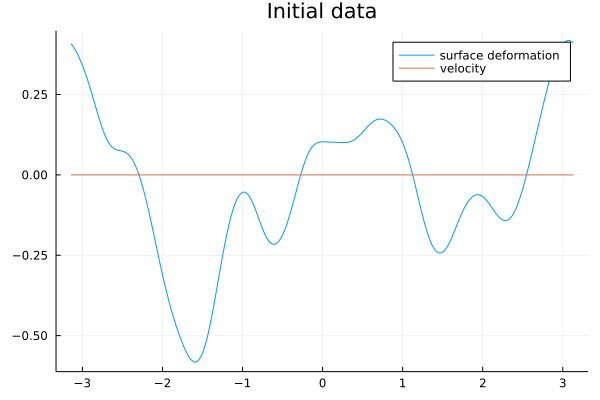

In [4]:
using Plots
x=Mesh(param).x
plot(x,[init.η(x) init.v(x)],label=["surface deformation" "velocity"],title="Initial data")

# First-order non-hydrostatic models

*Here we shall compare the Green-Naghdi model with the non-hydrostatic model of [Bristeau, Mangeney, Sainte-Marie and Seguin](https://dx.doi.org/10.3934/dcdsb.2015.20.961) and the square-root depth system of [Cotter, Holm and Percival](https://dx.doi.org/10.1098/rspa.2010.0124)*

Set up initial-value problems for different models to compare

In [5]:
WW = Problem( WaterWaves(param,dealias = 1, verbose=false), init, param ) 
GN = Problem( SerreGreenNaghdi(param; dealias = 0, iterate = true, precond = true), init, param )
NH = Problem( NonHydrostatic(param; dealias = 0, iterate = true, precond = true), init, param )
SRD= Problem( SquareRootDepth(param; dealias = 0, iterate = true, precond = true), init, param )

solve!(WW);solve!(GN);solve!(NH);solve!(SRD);

┌ Info: Now solving the initial-value problem water waves
│ with timestep dt=0.01, final time T=1.0,
│ and N=512 collocation points.
└ @ WaterWaves1D /home/user/WaterWaves1D.jl/src/problem.jl:123
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Now solving the initial-value problem Green-Naghdi
│ with timestep dt=0.01, final time T=1.0,
│ and N=512 collocation points.
└ @ WaterWaves1D /home/user/WaterWaves1D.jl/src/problem.jl:123
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Now solving the initial-value problem non-hydrostatic
│ with timestep dt=0.01, final time T=1.0,
│ and N=512 collocation points.
└ @ WaterWaves1D /home/user/WaterWaves1D.jl/src/problem.jl:123
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Now solving the initial-value problem square-root depth
│ with timestep dt=0.01, final time T=1.0,
│ and N=512 collocation points.
└ @ WaterWaves1D /home/user/WaterWaves1D.jl/src/prob

Plot solutions at final time


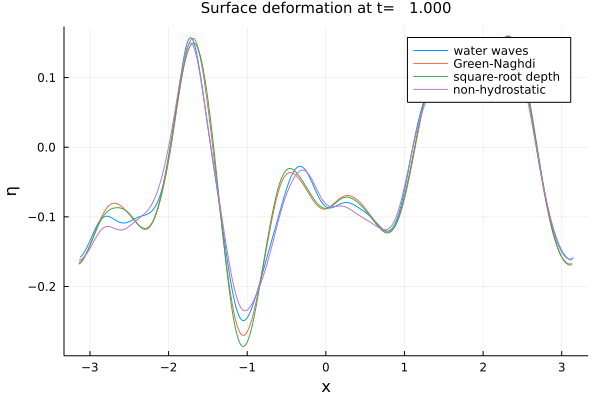

In [6]:
plot([WW,GN,SRD,NH])

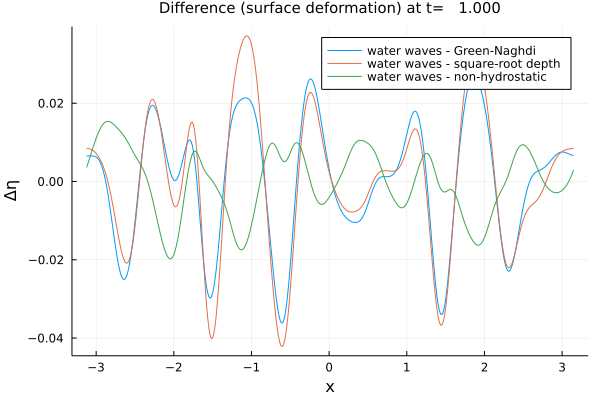

Errors (in l²). Serre-Green-Naghdi: 0.015511318755946904, Square-root depth: 0.017949975613769743, Non-hydrostatic: 0.008541328251706238

In [7]:
plt=plot([(WW,GN),(WW,SRD),(WW,NH)])
display(plt)

WWη,WWv,WWx,=solution(WW)
GNη,=solution(GN,x=WWx);errGN=norm(WWη-GNη)/sqrt(length(x))
SRDη,=solution(SRD,x=WWx);errSRD=norm(WWη-SRDη)/sqrt(length(x))
NHη,=solution(NH,x=WWx);errNH=norm(WWη-NHη)/sqrt(length(x))

print("Errors (in l²). Serre-Green-Naghdi: $errGN, Square-root depth: $errSRD, Non-hydrostatic: $errNH")

*Using the notation and terminology of Lannes, The water waves problem (isbn:978-0-8218-9470-5),*
+ *the Green-Naghdi model is consistent with precision O(μ²)*
+ *the Square-root-depth model is consistent with precision O(μ²+μϵ)*
+ *the Non-hydrostatic model is consistent with precision O(μ)*


*This can be checked by varying the parameters μ,ϵ*

*It happens however quite often when μ is fairly large (or L in the random initial data is small) that the non-hydrostatic model provides a better approximation than the Green-Naghdi and square-root-depth model. A possible explanation stems from the fact that the wave frequency of the former (ω(k)=±|k|(1/(1+¼μ|k|^2))^½) approaches better the wave frequency of the water waves system (ω(k)=±|k|(tanh(√μ|k|)/(√μ|k|))^½) for a finite range of wavenumbers, k, while the group velocity of the latter (ω(k)=±|k|(1/(1+⅓μ|k|^2))^½) is more accurate only for small wavenumbers.*

# Fully dispersive model

*Here we shall compare the Green-Naghdi model with the fully dispersive counterpart of [Duchêne, Israwi and Talhouk](https://dx.doi.org/10.1111/sapm.12125).*

Set up initial-value problems for different models to compare

In [8]:
WW = Problem( WaterWaves(param,dealias = 1, verbose=false), init, param ) 
GN = Problem( SerreGreenNaghdi(param; dealias = 0, iterate = true, precond = true), init, param )
WGN = Problem( WhithamGreenNaghdi(param; dealias = 0, iterate = true, precond = true), init, param )

solve!(WW);solve!(GN);solve!(WGN);

┌ Info: Now solving the initial-value problem water waves
│ with timestep dt=0.01, final time T=1.0,
│ and N=512 collocation points.
└ @ WaterWaves1D /home/user/WaterWaves1D.jl/src/problem.jl:123
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Now solving the initial-value problem Green-Naghdi
│ with timestep dt=0.01, final time T=1.0,
│ and N=512 collocation points.
└ @ WaterWaves1D /home/user/WaterWaves1D.jl/src/problem.jl:123
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Now solving the initial-value problem Whitham-Green-Naghdi
│ with timestep dt=0.01, final time T=1.0,
│ and N=512 collocation points.
└ @ WaterWaves1D /home/user/WaterWaves1D.jl/src/problem.jl:123
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


Plot solutions at final time


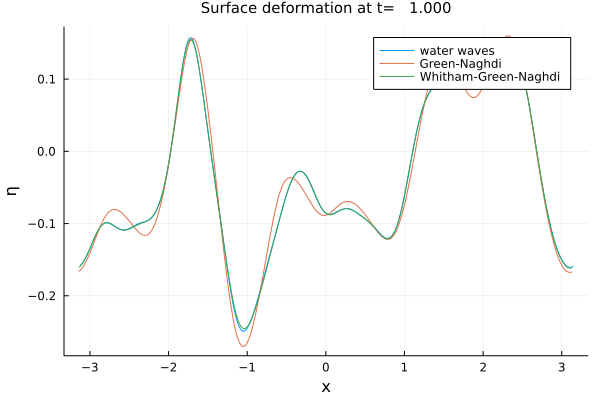

In [9]:
plot([WW,GN,WGN])

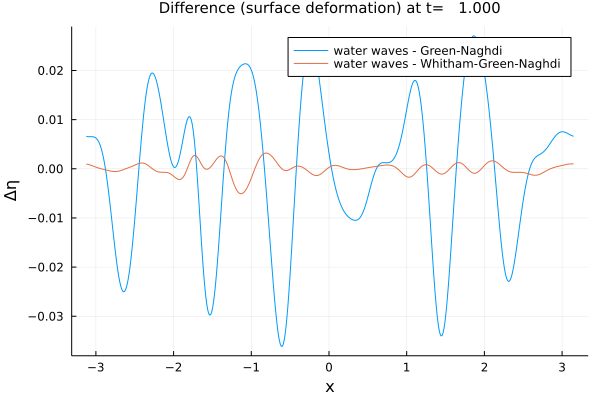

Errors (in l²). Serre-Green-Naghdi: 0.015511318755946904, Whitham-Green-Naghdi: 0.0013311152067953286

In [10]:
plt=plot([(WW,GN),(WW,WGN)])
display(plt)

WWη,WWv,WWx,=solution(WW)
GNη,=solution(GN,x=WWx);errGN=norm(WWη-GNη)/sqrt(length(x))
WGNη,=solution(WGN,x=WWx);errWGN=norm(WWη-WGNη)/sqrt(length(x))

print("Errors (in l²). Serre-Green-Naghdi: $errGN, Whitham-Green-Naghdi: $errWGN")

*Using the notation and terminology of Lannes, The water waves problem (isbn:978-0-8218-9470-5),*
+ *the Green-Naghdi model is consistent with precision O(μ²)*
+ *the fully dispersive model is consistent with precision O(μ²ϵ)*

*This can be checked by varying the parameters μ,ϵ*

# Higher-order model

*Here we shall compare the Green-Naghdi model with the 2nd order [Isobe-Kakinuma model](https://dx.doi.org/10.1061/9780784400890.023).*

Set up initial-value problems for different models to compare

In [11]:
WW = Problem( WaterWaves(param,dealias = 1, verbose=false), init, param ) 
GN = Problem( SerreGreenNaghdi(param; dealias = 0, iterate = true, precond = true), init, param )
IK = Problem( IsobeKakinuma(param; dealias = 0, iterate = true, precond = true), init, param )

solve!(WW);solve!(GN);solve!(IK);

┌ Info: Now solving the initial-value problem water waves
│ with timestep dt=0.01, final time T=1.0,
│ and N=512 collocation points.
└ @ WaterWaves1D /home/user/WaterWaves1D.jl/src/problem.jl:123
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Now solving the initial-value problem Green-Naghdi
│ with timestep dt=0.01, final time T=1.0,
│ and N=512 collocation points.
└ @ WaterWaves1D /home/user/WaterWaves1D.jl/src/problem.jl:123
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Now solving the initial-value problem Isobe-Kakinuma
│ with timestep dt=0.01, final time T=1.0,
│ and N=512 collocation points.
└ @ WaterWaves1D /home/user/WaterWaves1D.jl/src/problem.jl:123
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


Plot solutions at final time


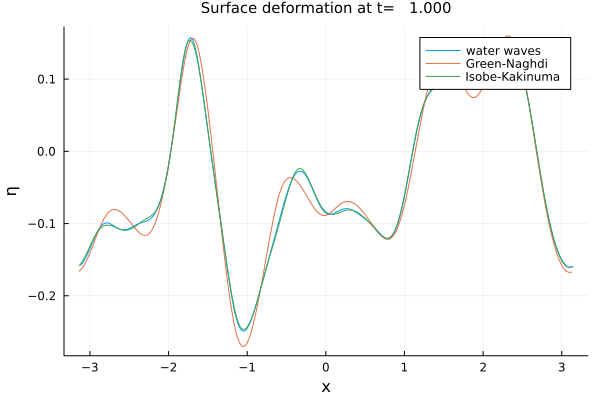

In [12]:
plot([WW,GN,IK])

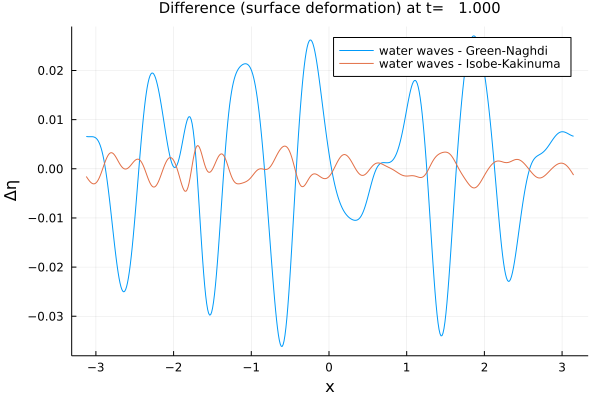

Errors (in l²). Serre-Green-Naghdi: 0.015511318755946904, Isobe-Kakinuma: 0.0020286489527625586

In [13]:
plt=plot([(WW,GN),(WW,IK)];fourier=false)
display(plt)

WWη,WWv,WWx,=solution(WW)
GNη,=solution(GN,x=WWx);errGN=norm(WWη-GNη)/sqrt(length(x))
IKη,=solution(IK,x=WWx);errIK=norm(WWη-IKη)/sqrt(length(x))

print("Errors (in l²). Serre-Green-Naghdi: $errGN, Isobe-Kakinuma: $errIK")

*Using the notation and terminology of Lannes, The water waves problem (isbn:978-0-8218-9470-5),*
+ *the Green-Naghdi model is consistent with precision O(μ²)*
+ *the Isobe-Kakinuma model is consistent with precision O(μ³)*

*This can be checked by varying the parameters μ,ϵ*

# Dispersion relations

*We compare the dispersion relations of the models appearing in this notebook. Recall variables are non-dimensionalized. For instance, the real dispersion relation of the water waves system (linearized about the rest state) is ω(ξ)² = g|ξ| tanh(d|ξ|), where g is the gravity acceleration and d the depth of the layer.*

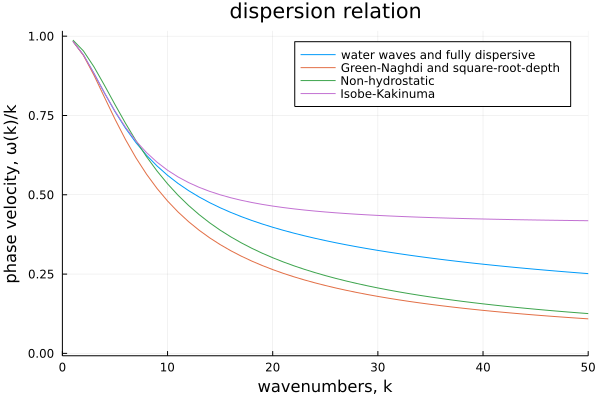

In [15]:
k=abs.(Mesh(param).k);μ=param.μ
ωWW(k)=k.*(tanh.(√μ*k)./(√μ*k)).^(1/2)
ωNH(k)=k.*(1 ./(1 .+μ/4*k.^2)).^(1/2)
ωGN(k)=k.*(1 ./(1 .+μ/3*k.^2)).^(1/2)
ωIK(k)=k.*((1 .+μ/15*k.^2)./(1 .+2*μ/5*k.^2)).^(1/2)
plot(k,[ωWW(k)./k ωGN(k)./k ωNH(k)./k ωIK(k)./k],
    label=["water waves and fully dispersive" "Green-Naghdi and square-root-depth" "Non-hydrostatic" "Isobe-Kakinuma"],
    xlabel="wavenumbers, k",ylabel="phase velocity, ω(k)/k", 
    title="dispersion relation")
xlims!(0,5/μ)